In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [3]:
#@title Plain Q Training - Step Reward
def QL_stepCost(lam = 0.4, Nsamples = 5, Nstates = 501, Nactions = 101, 
        epsDecay=0.9999, learningRate = 0.001, Nthetas = 100, Nsweeps = 10000):

    S = np.linspace(0,1,Nstates)
    A = np.linspace(0,0.5,Nactions)
    Q = np.zeros((Nsamples+1, Nstates, Nactions))
    
    for nn in range(Nsamples+1):
        for aa in range(Nactions):
            Q[nn, :, aa] = S
    
    epsilon = 1
    minEpsilon = 0.1
    np.random.seed(1)
    for ii in range(Nsweeps):
        thtRange = np.random.rand(100)  
        
        for theta in thtRange:
            
            Xc = 0  # current end of interval
            Xo = 1  # opposite end
            lb = 0  # lower bound
            ub = 1  # upper bound
            
            for nn in range(Nsamples):
                # choose next action according to epsilon-greedy policy                
                state = ub - lb
                ss = np.argmin(np.abs(S - state)) 

                if ss > 1:
                    
                    U = np.random.rand()
                    if U < epsilon:
                        # explore with probability epsilon
                        aa = np.random.randint(Nactions)
                    else:
                        # exploit with probability 1-epsilon
                        aa = np.argmin(Q[nn,ss,:])

                    act  = A[aa]
                    dist = state*act

                    if Xc < Xo:   
                        Xc += dist

                    elif Xc > Xo:
                        Xc -= dist
                        
                    if Xc < theta:
                        lb = Xc
                        Xo = ub
                    else:
                        ub = Xc         
                        Xo = lb
                        
                    newState = ub - lb
                    newSS = np.argmin(np.abs(S - newState))

                    reward = lam*dist

                    Q[nn, ss, aa] += learningRate*(reward + np.amin(Q[nn+1, newSS :]) - Q[nn, ss, aa])
                    
        epsilon = max(minEpsilon, epsilon*epsDecay)
                
        print('\rsweep: %d of %d. eps: %.4f'%(ii+1, Nsweeps, epsilon),end="")
    return Q

In [4]:
start = time.time()
Q = QL_stepCost(Nsamples = 5, epsDecay = 0.99995, Nsweeps = 50500)
stop = time.time()
print("\nTime: ", stop-start)
# np.save('./Policies/Q_table_Uniform_lam4_N5_s501_A101',Q)

sweep: 50500 of 50500. eps: 1.0000
Time:  1167.896919965744


In [5]:
Nsamples = 5
Nstates  = 501
Nactions = 101
bestAction = np.zeros((Nsamples, Nstates))
A = np.linspace(0, 0.5, Nactions)
for nn in range(Nsamples):
    for ll in range(Nstates):
        bestAction[nn, ll] = A[np.argmin(Q[nn, ll, :])]
np.save('./Policies/QL_bestAction_Uniform_lam4_N5_s501_A101',bestAction)

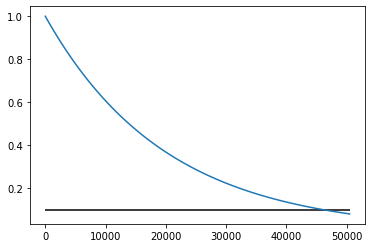

In [51]:
a = 1
b = 50500
x = np.linspace(a,b,100)
y = 0.99995**x
plt.plot(x,y)
plt.hlines(0.1, a, b)